In [1]:
import pyswmm5 as ps
from pyswmm5.plot_publication import *
import seaborn as sns

# Read .inp file
Read .inp file and store data as Pandas dataframe

In [2]:
# Read inp file
swmmInp = ps.SwmmInp('input/uds1.inp')
# data were stored in a Pandas dataframe like a spreedsheet.
swmmInp.subcatch

,raingage,outlet,area,imperv,width,slope,curblen
name,,,,,,,
A1,YLJ1,J14,0.32,56.8,63.0,0.480,0.0
A2,YLJ1,J17,0.28,65.0,60.0,0.900,0.0
A3,YLJ1,J20,0.44,65.0,64.0,0.410,0.0
A4,YLJ1,J29,0.32,55.0,54.0,0.670,0.0
A5,YLJ1,J35,0.50,65.0,60.0,1.000,0.0
...,...,...,...,...,...,...,...
ZHS41,YLJ1,JB37,0.50,41.0,55.0,0.590,0.0
ZHS42,YLJ1,JB38,0.86,50.0,56.0,0.620,0.0
ZHS43,YLJ1,JB39,0.80,57.6,61.0,0.798,0.0


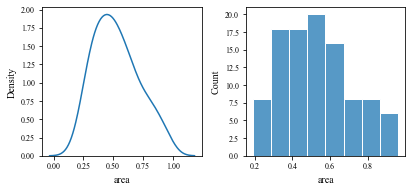

In [3]:
# * visualize distribution of some attributes that you are interested.
Fig = FigurePublication(1, 2)
sns.set_style('darkgrid')
sns.kdeplot(swmmInp.subcatch['area'], ax=Fig.ax[0])
sns.histplot(swmmInp.subcatch['area'], ax=Fig.ax[1])
Fig.save('output/subcatch.svg')
# # improve figure format
# Fig.update()
# matplotlib.rc('font', **font)


# Modify .inp

In [4]:
# Change some parameters and options
swmmInp.option.loc['HEAD_TOLERANCE', 'value'] = '0.0005'

# Export .inp to GIS format

In [5]:
GIS = ps.Swmm2Gis(swmmInp)
# Before saving, you can make some edit, like add more columns in link.
GIS.save_all('output/test') # files will be stored in this folder
GIS.node

All data are saved in .shp format. 2 files are created.


c:\Users\ruozh\anaconda3\envs\pyswmm5\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,elevation,maxDepth,initDepth,surDepth,aponded,objectType,type,gated,geometry
name,,,,,,,,,
J2,192.60,8.30,0.0,0.0,0.0,junction,NaN,NaN,POINT (5409.879 8479.091)
J6,189.10,4.00,0.0,0.0,0.0,junction,NaN,NaN,POINT (6105.993 8412.896000000001)
J7,191.92,2.20,0.0,0.0,0.0,junction,NaN,NaN,POINT (6364.672 9457.120999999999)
J8,188.55,3.00,0.0,0.0,0.0,junction,NaN,NaN,POINT (5930.993 7032.537)
J9,187.85,3.50,0.0,0.0,0.0,junction,NaN,NaN,POINT (6530.541 7072.617)
...,...,...,...,...,...,...,...,...,...
JB38,190.72,5.00,0.0,0.0,0.0,junction,NaN,NaN,POINT (5329.875 6279.833)
JB39,190.99,3.04,0.0,0.0,0.0,junction,NaN,NaN,POINT (5335.102 5955.752)
JB40,191.64,3.80,0.0,0.0,0.0,junction,NaN,NaN,POINT (5335.102 5605.535)


# Run simulation

In [6]:
databaseName = swmmInp.run_swmm('output/', filename='test')

The output/testtmp6ad166ae03034d0482663dde564c0158.inp is saved.


# Retrieve data from database

In [7]:
# get result
swmmRpt = ps.SwmmRpt(databaseName)
# get the record of subcatchment A1
swmmRpt.get_result_timeseries(objName='A1', objType='subcatch')

,period,precip,loss,runoff
0,2014-06-23 00:05:00,23.400000,0.000000,0.000000
1,2014-06-23 00:10:00,46.799999,9.347492,1.706184
2,2014-06-23 00:15:00,61.680000,6.728385,18.085430
3,2014-06-23 00:20:00,74.400002,4.851713,30.849947
4,2014-06-23 00:25:00,63.720001,3.507019,42.582787
...,...,...,...,...
139,2014-06-23 11:40:00,0.000000,0.108000,0.000000
140,2014-06-23 11:45:00,0.000000,0.108000,0.000000
141,2014-06-23 11:50:00,0.000000,0.108000,0.000000
142,2014-06-23 11:55:00,0.000000,0.108000,0.000000


# Visualize result

Initialize visual node: section storage not found.
Initialize visual link: section pump not found.


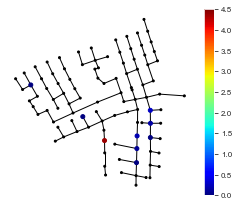

In [8]:
Fig = FigurePublication(1, 1)
# parameter
df = swmmRpt.summary_node_flood()
floods = df['totalVolume'].tolist()
idx = df.index.tolist()
# visualize
visual = ps.Visualization(swmmInp, ax=Fig.ax, fig=Fig.fig)
visual.base_map(linkWidth=1, nodeSize=4)
visual.highlight_node(idx, color=floods, nodeSize=16,
                      colorbar=True, colorbarRange=(0, 4.5))  # , colorbar=True)
Fig.save('output/node.svg')
